In [1]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
#surpress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
#pull in data and take a high level look
dataA = pd.read_csv('Data/tasksheetdataa.csv')
dataZ = pd.read_csv('Data/tasksheetdataz.csv')

In [4]:
dataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fileid    33120 non-null  object 
 1   stusab    33120 non-null  object 
 2   chariter  33120 non-null  int64  
 3   cifsn     33120 non-null  int64  
 4   logrecno  33120 non-null  int64  
 5   p0010001  33120 non-null  int64  
 6   sumlev    33120 non-null  int64  
 7   geocomp   33120 non-null  int64  
 8   zcta5     33120 non-null  int64  
 9   arealand  33120 non-null  int64  
 10  areawatr  33120 non-null  int64  
 11  name      33120 non-null  object 
 12  funcstat  33120 non-null  object 
 13  pop100    33120 non-null  int64  
 14  hu100     33120 non-null  int64  
 15  intptlat  33120 non-null  float64
 16  intptlon  33120 non-null  float64
 17  lsadc     33120 non-null  object 
dtypes: float64(2), int64(11), object(5)
memory usage: 4.5+ MB


In [5]:
#Need to add leading 0s to zip code
dataA.head()

,fileid,stusab,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc
0,UR1US,US,0,1,479832,18570,860,0,601,166659789,799296,ZCTA5 00601,S,18570,7744,18.180556,-66.749961,Z5
1,UR1US,US,0,1,479836,41520,860,0,602,79288158,4446273,ZCTA5 00602,S,41520,18073,18.362268,-67.176130,Z5
2,UR1US,US,0,1,479839,54689,860,0,603,81880442,183425,ZCTA5 00603,S,54689,25653,18.455183,-67.119887,Z5
3,UR1US,US,0,1,479842,6615,860,0,606,109580061,12487,ZCTA5 00606,S,6615,2877,18.158345,-66.932911,Z5
4,UR1US,US,0,1,479847,29016,860,0,610,93021467,4172001,ZCTA5 00610,S,29016,12618,18.290955,-67.125868,Z5


In [6]:
dataZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41469 entries, 0 to 41468
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         41469 non-null  object 
 1   zip             41469 non-null  int64  
 2   city            41469 non-null  object 
 3   state           40956 non-null  object 
 4   stusab          40958 non-null  object 
 5   county          40958 non-null  object 
 6   county_fips     40958 non-null  float64
 7   community       1 non-null      object 
 8   community_code  1 non-null      float64
 9   latitude        41469 non-null  float64
 10  longitude       41469 non-null  float64
 11  accuracy        40937 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 3.8+ MB


In [7]:
dataZ.head()

,country,zip,city,state,stusab,county,county_fips,community,community_code,latitude,longitude,accuracy
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0


In [8]:
#Confirming need to add leading 0s to zip code here as well
dataZ[dataZ['zip'] < 1000]

,country,zip,city,state,stusab,county,county_fips,community,community_code,latitude,longitude,accuracy
26775,US,501,Holtsville,New York,NY,Suffolk,103.0,NaN,NaN,40.8154,-73.0451,4.0
26776,US,544,Holtsville,New York,NY,Suffolk,103.0,NaN,NaN,40.8154,-73.0451,4.0


In [9]:
#Add leading 0s to zip codes in both datasets
dataA['zcta5'] = dataA['zcta5'].astype(str)
dataZ['zip'] = dataZ['zip'].astype(str)
dataA['zcta5'] = dataA['zcta5'].str.zfill(5)
dataZ['zip'] = dataZ['zip'].str.zfill(5)

In [10]:
#Join dataframes together
merged = pd.merge(dataA, dataZ, left_on = 'zcta5', right_on = 'zip', how = 'inner')

In [11]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32974 entries, 0 to 32973
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fileid          32974 non-null  object 
 1   stusab_x        32974 non-null  object 
 2   chariter        32974 non-null  int64  
 3   cifsn           32974 non-null  int64  
 4   logrecno        32974 non-null  int64  
 5   p0010001        32974 non-null  int64  
 6   sumlev          32974 non-null  int64  
 7   geocomp         32974 non-null  int64  
 8   zcta5           32974 non-null  object 
 9   arealand        32974 non-null  int64  
 10  areawatr        32974 non-null  int64  
 11  name            32974 non-null  object 
 12  funcstat        32974 non-null  object 
 13  pop100          32974 non-null  int64  
 14  hu100           32974 non-null  int64  
 15  intptlat        32974 non-null  float64
 16  intptlon        32974 non-null  float64
 17  lsadc           32974 non-null 

In [12]:
#a - Texas is the state with the most 5-digit zip codes (1,935)
merged['state'].value_counts().sort_values(ascending=False)

Texas                   1935
Pennsylvania            1795
New York                1794
California              1761
Illinois                1383
Ohio                    1195
Missouri                1023
Michigan                 986
Florida                  983
Iowa                     934
Virginia                 896
Minnesota                884
North Carolina           808
Indiana                  775
Wisconsin                774
Kentucky                 767
Georgia                  735
West Virginia            706
Kansas                   697
Oklahoma                 648
Alabama                  642
Tennessee                628
Washington               596
New Jersey               595
Arkansas                 591
Nebraska                 581
Massachusetts            537
Colorado                 525
Louisiana                515
Maryland                 468
Maine                    432
South Carolina           424
Mississippi              423
Oregon                   417
Arizona       

In [13]:
#Used to test for directional change in latitude/longitude values
merged[merged['state'] == 'Alaska'].head(1)
merged[merged['state'] == 'Minnesota'].head(1)
merged[merged['state'] == 'Texas'].head(1)
merged[merged['state'] == 'Oregon'].head(1)

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,...,city,state,stusab_y,county,county_fips,community,community_code,latitude,longitude,accuracy
31723,UR1US,US,0,1,586622,229,860,0,97001,770309402,...,Antelope,Oregon,OR,Wasco,65.0,NaN,NaN,44.8892,-120.7914,4.0


In [14]:
#b(i) - 04631 is the most easterly zip
merged[merged['longitude']== merged['longitude'].max()]

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,...,city,state,stusab_y,county,county_fips,community,community_code,latitude,longitude,accuracy
1129,UR1US,US,0,1,483733,1331,860,0,04631,9455354,...,Eastport,Maine,ME,Washington,29.0,NaN,NaN,44.92,-67.0074,4.0


In [15]:
#Exclude Alaska for most Northern/Western zip calculation
merged_no_AK = merged[merged['state'] != 'Alaska']

In [16]:
#b(ii) - 96769 is the most westerly zip (excluding Alaska)
merged_no_AK[merged['longitude']== merged_no_AK['longitude'].min()]

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,...,city,state,stusab_y,county,county_fips,community,community_code,latitude,longitude,accuracy
31680,UR1US,US,0,1,586499,464,860,0,96769,193525234,...,Makaweli,Hawaii,HI,Kauai,7.0,NaN,NaN,21.9454,-159.9214,1.0


In [17]:
#b(iii) - 56711 is the most northerly zip (excluding Alaska)
merged_no_AK[merged['latitude']== merged_no_AK['latitude'].max()]

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,...,city,state,stusab_y,county,county_fips,community,community_code,latitude,longitude,accuracy
19123,UR1US,US,0,1,544425,96,860,0,56711,48964391,...,Angle Inlet,Minnesota,MN,Lake of the Woods,77.0,NaN,NaN,49.3453,-95.0627,4.0


In [18]:
#filter out zips with no population for subsequent density calculations
merged_has_population = merged[merged['p0010001'] > 0]

In [19]:
#Density calculation
merged_has_population['persons per thousand land units'] = (merged_has_population['p0010001'] / merged_has_population['arealand']) * 1000

In [20]:
#c Zip code 20052 has the highest population density at 67 persons per thousand land units
merged_has_population[merged_has_population['persons per thousand land units'] == merged_has_population['persons per thousand land units'].max()]

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,...,state,stusab_y,county,county_fips,community,community_code,latitude,longitude,accuracy,persons per thousand land units
6105,UR1US,US,0,1,499507,470,860,0,20052,7062,...,District of Columbia,DC,District of Columbia,1.0,NaN,NaN,38.9001,-77.0479,4.0,66.553384


In [21]:
#Add 3-digit zip to original merged dataframe
merged['zip3'] = 0
for i in range(0,len(merged)):
     merged['zip3'][i] = merged['zip'][i][0:3]

In [22]:
#Create subset of original dataframe with zip3 and state mapping
zip3_state = merged[['zip3','state']]

In [23]:
#Remove duplicate pairings to determine which 3-digit zips are paired to more than one state
zip3_state.drop_duplicates(inplace=True)

In [24]:
#d(i) - 063 and 834 are mapped to more than one state
zip3_state.groupby('zip3').count().sort_values(by = 'state',ascending=False)

,state
zip3,
063,2
834,2
010,1
654,1
641,1
...,...
326,1
327,1
328,1


In [25]:
#Drilldown on 3-digit zip city/state info within original merged dataframe
merged[['city','state']][merged['zip3'] == '063']

,city,state
1654,New London,Connecticut
1655,Baltic,Connecticut
1656,Canterbury,Connecticut
1657,Central Village,Connecticut
1658,East Lyme,Connecticut
1659,Bozrah,Connecticut
1660,Gales Ferry,Connecticut
1661,Gilman,Connecticut
1662,Ledyard,Connecticut
1663,Groton,Connecticut


In [26]:
#d(ii) - the incongrous cities are Fisher's Island in New York and Alta in Wyoming
merged[['city','state']][merged['zip3'] == '834']

,city,state
28441,Idaho Falls,Idaho
28442,Idaho Falls,Idaho
28443,Idaho Falls,Idaho
28444,Idaho Falls,Idaho
28445,Alta,Wyoming
28446,Ashton,Idaho
28447,Chester,Idaho
28448,Driggs,Idaho
28449,Dubois,Idaho
28450,Felt,Idaho


In [27]:
#create dataset without these two rows
merged_2 = merged.drop([1688,28445])

In [28]:
#Aggregation of population / land area by 3-digit zip and state
summary_df = merged_2[['zip3','state','p0010001','arealand']]
summary_df = summary_df.groupby(['zip3','state'])[['p0010001','arealand']].sum()

In [29]:
#Remove MultiIndex for easier manipulation
summary_df.reset_index(level=['zip3','state'],inplace=True)

In [30]:
#e(i) - There are 13 3-digit zips between 10 and 19,999 residents
small_df = summary_df[ (summary_df['p0010001'] >= 10) & (summary_df['p0010001'] < 20000) ]
len(small_df)

13

In [31]:
#Summary view of 3-digit zips with low population - DC/NY are outliers in terms of density
small_df['Persons / 100M land units'] = (small_df['p0010001'] / small_df['arealand'] ) * 100000000
small_df = small_df.sort_values(by = 'Persons / 100M land units', ascending=True).round(1)
small_df

,zip3,state,p0010001,arealand,Persons / 100M land units
746,821,Wyoming,369,7698493836,4.8
798,893,Nevada,12103,18040900958,67.1
795,884,New Mexico,17370,25465767488,68.2
633,692,Nebraska,8637,12215685056,70.7
789,878,New Mexico,18552,24362674732,76.1
748,823,Wyoming,16430,13883818454,118.3
510,556,Minnesota,16024,7788672063,205.7
790,879,New Mexico,17432,7110318330,245.2
48,059,Vermont,3525,1168172499,301.8
338,369,Alabama,19164,3159815117,606.5


In [32]:
#Create dataframes for subsequent visualization
small_df_no_NYDC = small_df[(small_df['state'] != 'New York') & (small_df['state'] != 'District of Columbia')]
small_df_NYDC = small_df[(small_df['state'] == 'New York') | (small_df['state'] == 'District of Columbia')]

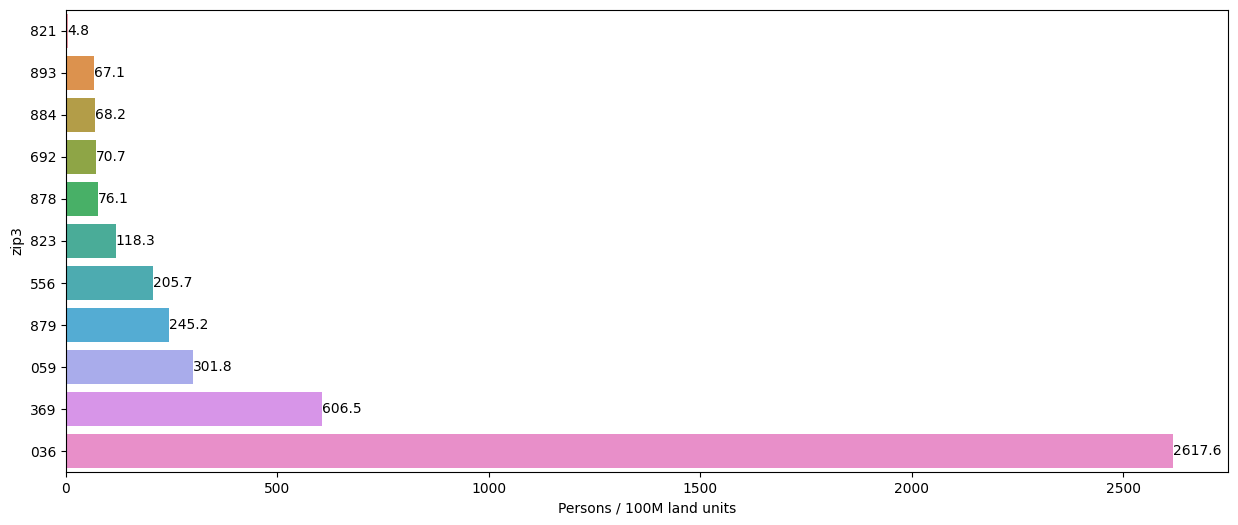

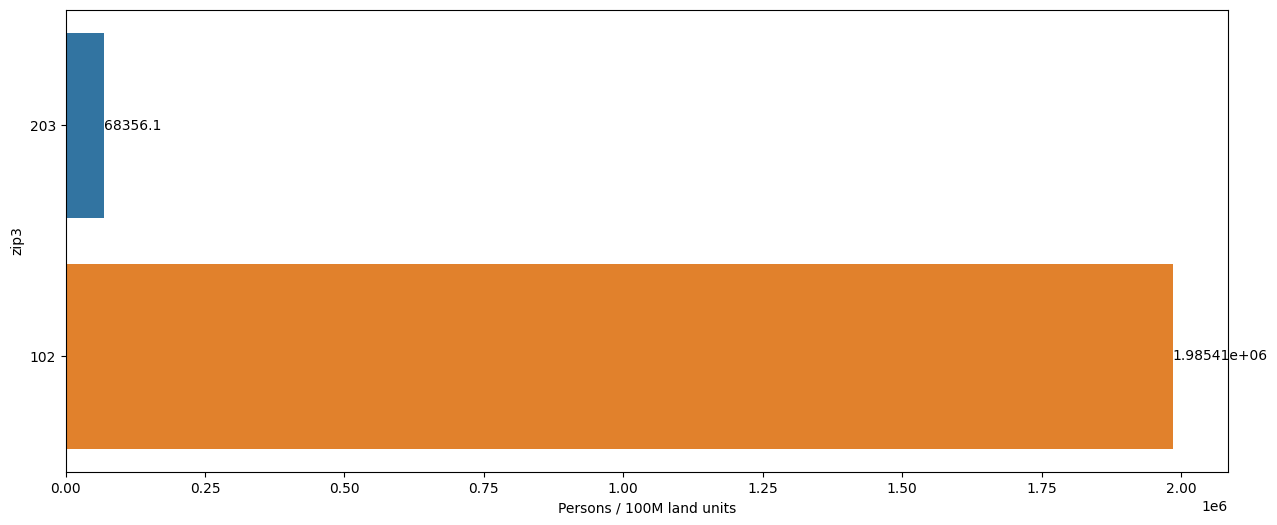

In [33]:
#e(ii) DC and New York split onto separate bar chart due to drastic difference in population density and for readability of chart.
#NH is fairly dense compared to other small zips but more in line with zips not in dense urban areas.

#Create barplots to illustrate variation in population density
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=small_df_no_NYDC, y = 'zip3', x = 'Persons / 100M land units', order = small_df_no_NYDC.sort_values('Persons / 100M land units').zip3) 
ax.bar_label(ax.containers[0])
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=small_df_NYDC, y = 'zip3', x = 'Persons / 100M land units', order = small_df_NYDC.sort_values('Persons / 100M land units').zip3) 
ax.bar_label(ax.containers[0])
plt.show()

In [34]:
#e(iii) The 3-digit zip of 821 has the smallest population density - this is somewhat surprising as I would have guessed Alaska.
small_df.sort_values(by = 'Persons / 100M land units', ascending=True).round(0)

,zip3,state,p0010001,arealand,Persons / 100M land units
746,821,Wyoming,369,7698493836,5.0
798,893,Nevada,12103,18040900958,67.0
795,884,New Mexico,17370,25465767488,68.0
633,692,Nebraska,8637,12215685056,71.0
789,878,New Mexico,18552,24362674732,76.0
748,823,Wyoming,16430,13883818454,118.0
510,556,Minnesota,16024,7788672063,206.0
790,879,New Mexico,17432,7110318330,245.0
48,059,Vermont,3525,1168172499,302.0
338,369,Alabama,19164,3159815117,606.0


In [35]:
#confirming answer above is not Alaska due to population parameters the below is filtered out  
summary_df['Persons / 100M land units'] = (summary_df['p0010001'] / summary_df['arealand'] ) * 100000000
summary_df[summary_df['state'] == 'Alaska'].sort_values(by = 'Persons / 100M land units',ascending = False).round(0)

,zip3,state,p0010001,arealand,Persons / 100M land units
886,995,Alaska,320660,149810726268,214.0
889,998,Alaska,49595,35487047529,140.0
887,996,Alaska,184083,138819400255,133.0
890,999,Alaska,21403,25345328487,84.0
888,997,Alaska,134189,261368179739,51.0


In [36]:
#f - overview of population distribution for 5-digit zips
merged_2.describe()

,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,arealand,areawatr,pop100,hu100,intptlat,intptlon,county_fips,community_code,latitude,longitude,accuracy
count,32972.0,32972.0,32972.000000,32972.000000,32972.0,32972.0,3.297200e+04,3.297200e+04,32972.000000,32972.000000,32972.000000,32972.000000,32970.000000,1.0,32972.000000,32972.000000,32972.000000
mean,0.0,1.0,535264.705963,9363.254246,860.0,0.0,2.250865e+08,5.120114e+06,9363.254246,3993.982106,38.916202,-91.116143,84.905247,47280.0,38.915023,-91.116631,3.916293
std,0.0,0.0,32455.205043,13670.127639,0.0,0.0,6.575867e+08,3.314201e+07,13670.127639,5551.956392,5.210680,15.084655,85.772864,NaN,5.206040,15.087276,0.494088
min,0.0,1.0,480306.000000,0.000000,860.0,0.0,5.094000e+03,0.000000e+00,0.000000,0.000000,19.064517,-176.629994,1.000000,47280.0,19.066800,-176.634000,1.000000
25%,0.0,1.0,506568.000000,733.000000,860.0,0.0,2.354113e+07,5.795600e+04,733.000000,364.000000,35.458384,-97.274053,27.000000,47280.0,35.454075,-97.275425,4.000000
50%,0.0,1.0,535184.500000,2778.000000,860.0,0.0,9.327648e+07,5.797135e+05,2778.000000,1317.000000,39.529973,-88.265090,67.000000,47280.0,39.528350,-88.261900,4.000000
75%,0.0,1.0,563798.000000,12811.000000,860.0,0.0,2.305539e+08,2.765582e+06,12811.000000,5586.250000,42.131760,-80.310621,115.000000,47280.0,42.126600,-80.309350,4.000000
max,0.0,1.0,590582.000000,113916.000000,860.0,0.0,3.478610e+10,2.476574e+09,113916.000000,47617.000000,71.254083,-67.008913,840.000000,47280.0,71.234600,-67.007400,4.000000


In [37]:
#overview of population distribution for 3-digit zips
summary_df.describe().round(0)

,p0010001,arealand,Persons / 100M land units
count,891.0,8.910000e+02,891.0
mean,346492.0,8.329463e+09,51982.0
std,372946.0,1.406425e+10,206108.0
min,0.0,1.339200e+04,0.0
25%,116034.0,1.049466e+09,1700.0
50%,212201.0,5.001696e+09,4810.0
75%,441237.0,1.069824e+10,33053.0
max,2906700.0,2.613682e+11,3873153.0


<AxesSubplot:ylabel='p0010001'>

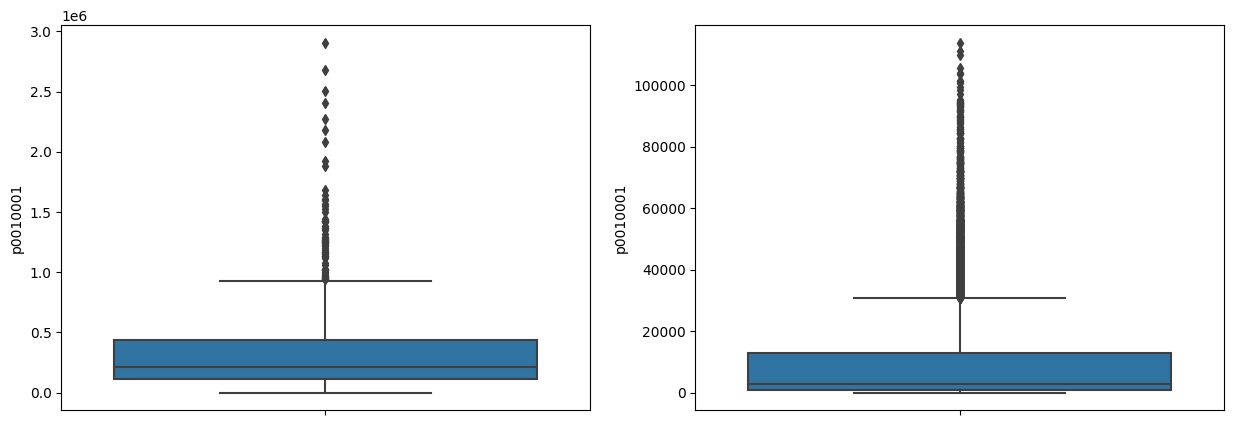

In [38]:
#Side by side boxplots - Left side is zip3 distribuion and right side is 5-digit zip distribution
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data = summary_df, y='p0010001',ax=axes[0])
sns.boxplot(data = merged_2, y='p0010001',ax=axes[1])

1. As expected, there is a higher mean population for 3-digit zips as they are a combination of many different 5-digit zip codes. On average, there are 37 5-digit zip codes per 3-digit zip (32,972/891). </br></br>

2. In both cases, outliers are skewed towards higher values but that is due to nature of the data with the floor of an observation value being 0. There are more outliers on the 5-digit zip plot but also more observations. </br></br>

3. 5-digit zip populations are more positively skewed as the median is comparatively closer to the bottom of the IQR. </br></br>

4. There is a wider range of population values at the 3-digit zip level as the whiskers are longer than the ones for the 5-digit plot.



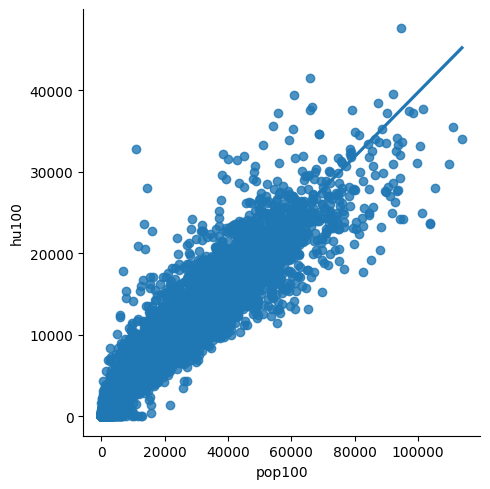

In [39]:
sns.lmplot(data=merged_2,x='pop100',y='hu100')
plt.show()

Generally speaking, it is assumed that there would be a positive relationship between population size and the number of housing units needed. </br>This is confirmed by the above plot.